In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Leyendo los datos y haciendo una limpieza:

In [2]:
tp=pd.read_csv("tp.csv",encoding='utf-8')

In [3]:
#camiando los nombre de columnas para una mejor comprensio
tp.rename(columns={"Pricing, Delivery_Terms_Quote_Appr":"Pri_Deli_Terms_Quote_Appr",\
                  "Pricing, Delivery_Terms_Approved":"Pri_Deli_Terms_Appr"},inplace=True)
#seteando en formato fecha la columna Account_Created_Date
tp.Account_Created_Date=pd.to_datetime(tp.Account_Created_Date)

Aca se analizara la cantidad de ventas hechas por territorio y Region:

Ahora paso a analizar las Regiones donde se produjeron estas ventas:

In [4]:
cant_vent_Region=tp.groupby("Region").agg({"Region":"count"}).\
rename(columns={"Region":"cant_vent_Region"}).\
sort_values("cant_vent_Region",ascending=False).head(25)

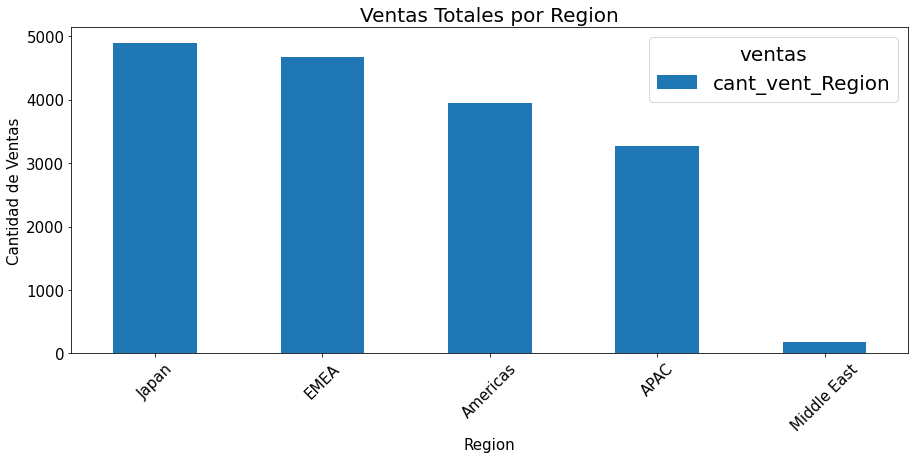

In [15]:
cant_vent_Region.plot(kind="bar",stacked=True, fontsize=15,rot=45,)
plt.title('Ventas Totales por Region', fontsize=20);
plt.xlabel('Region', fontsize=15);
plt.ylabel('Cantidad de Ventas', fontsize=15)
plt.legend(title="ventas", fontsize=20, title_fontsize=20)
plt.savefig('region_stage.png')

viendo que aparece como region Japon voy a analizar los datos de region:

In [16]:
tp.Territory=tp.where(tp.Territory.str.contains("None")==False & tp.Region.str.contains("None"),"Japan").Territory

In [17]:
tp.Territory.value_counts().reset_index().head(10)

,index,Territory
0,Japan,5680
1,Germany,1682
2,NW America,1568
3,Australia,1208
4,India,809
5,NE America,760
6,Netherlands,533
7,SE America,493
8,France,449
9,Singapore,441


In [18]:
tp.Territory=tp.where(tp.Territory.str.contains(" America")==False,"America").Territory

In [19]:
cant_vent_Territory=tp.groupby("Territory").agg({"Territory":"count"}).\
rename(columns={"Territory":"cant_vent_Territory"}).\
sort_values("cant_vent_Territory",ascending=False).head(25)

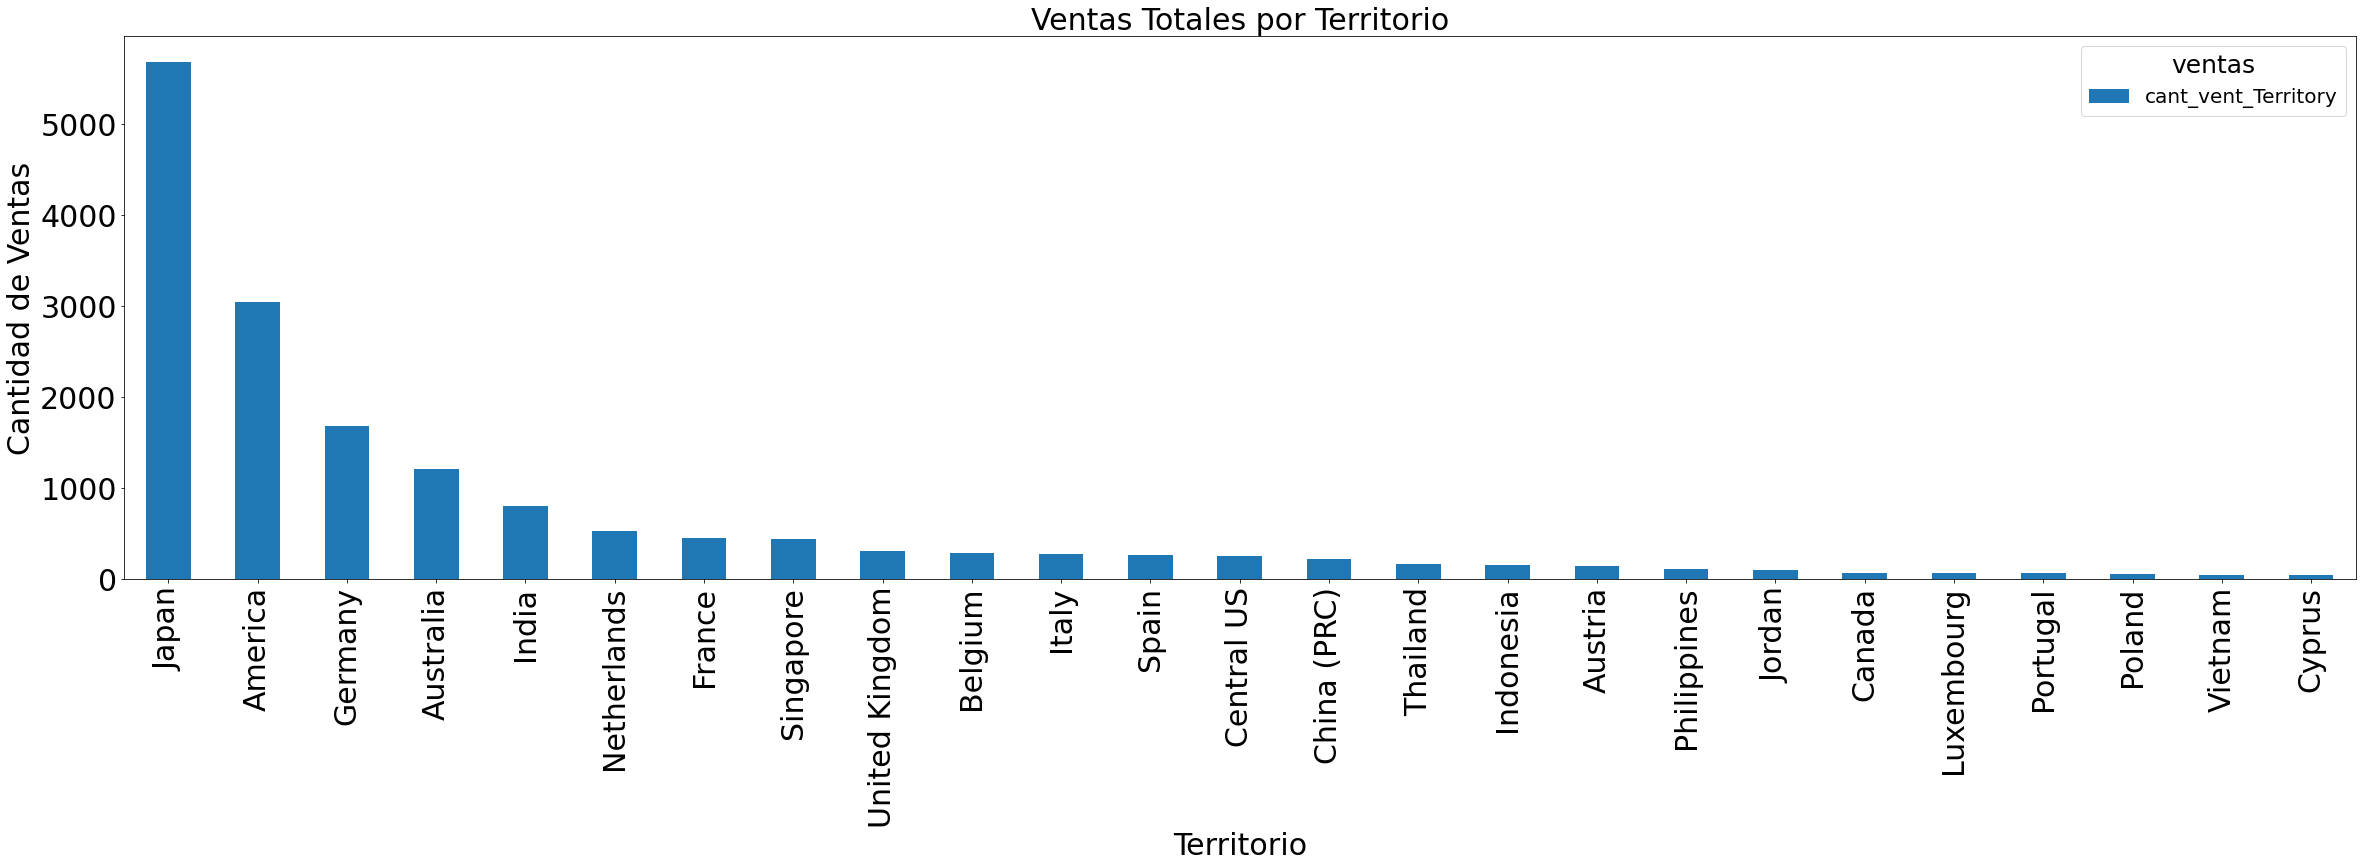

In [36]:
cant_vent_Territory.plot(kind="bar",stacked=True, fontsize=30,figsize=(40,10))
plt.title('Ventas Totales por Territorio', fontsize=30);
plt.xlabel('Territorio', fontsize=30);
plt.ylabel('Cantidad de Ventas', fontsize=30)
plt.legend(title="ventas", fontsize=20, title_fontsize=25)
plt.savefig('territorio_stage.png')

Podemos ver que las mayores ventas se producen en territorio Japones Aleman Americano Australiano indio, son aquellos lugares de donde podremos sacar mas informacion para 
las futuras predicciones.

In [37]:
tp_top10=tp.Territory.value_counts().reset_index().head(10)
tp_top10=tp_top10.rename(columns={"Territory":"cantidad_ventas","index":"Territory"})

In [38]:
tp_top10

,Territory,cantidad_ventas
0,Japan,5680
1,America,3045
2,Germany,1682
3,Australia,1208
4,India,809
5,Netherlands,533
6,France,449
7,Singapore,441
8,United Kingdom,313
9,Belgium,285


In [39]:
top10=tp[["Territory","Stage"]].merge(tp_top10,how="right",on="Territory")

In [40]:
tp_terri_Acconun=tp[["Territory","Account_Name","Stage"]].merge(tp_top10,how="right",on="Territory")

In [41]:
top10

,Territory,Stage,cantidad_ventas
0,Japan,Closed Lost,5680
1,Japan,Closed Won,5680
2,Japan,Closed Lost,5680
3,Japan,Closed Lost,5680
4,Japan,Closed Lost,5680
...,...,...,...
14440,Belgium,Closed Won,285
14441,Belgium,Closed Won,285
14442,Belgium,Closed Won,285
14443,Belgium,Closed Won,285


In [42]:
tp_terri_Acconun

,Territory,Account_Name,Stage,cantidad_ventas
0,Japan,Account_Name_619,Closed Lost,5680
1,Japan,Account_Name_619,Closed Won,5680
2,Japan,Account_Name_1888,Closed Lost,5680
3,Japan,Account_Name_1888,Closed Lost,5680
4,Japan,Account_Name_1888,Closed Lost,5680
...,...,...,...,...
14440,Belgium,Account_Name_350,Closed Won,285
14441,Belgium,Account_Name_350,Closed Won,285
14442,Belgium,Account_Name_1100,Closed Won,285
14443,Belgium,Account_Name_1274,Closed Won,285


In [43]:
top10_reset=top10.groupby(["Territory","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_stage"}).reset_index()

In [44]:
top10_reset

,Territory,Stage,cantidad_stage
0,America,Closed Lost,1567
1,America,Closed Won,1465
2,America,Negotiation,8
3,America,Proposal,5
4,Australia,Closed Lost,506
5,Australia,Closed Won,696
6,Australia,Proposal,4
7,Australia,Qualification,2
8,Belgium,Closed Lost,98
9,Belgium,Closed Won,187


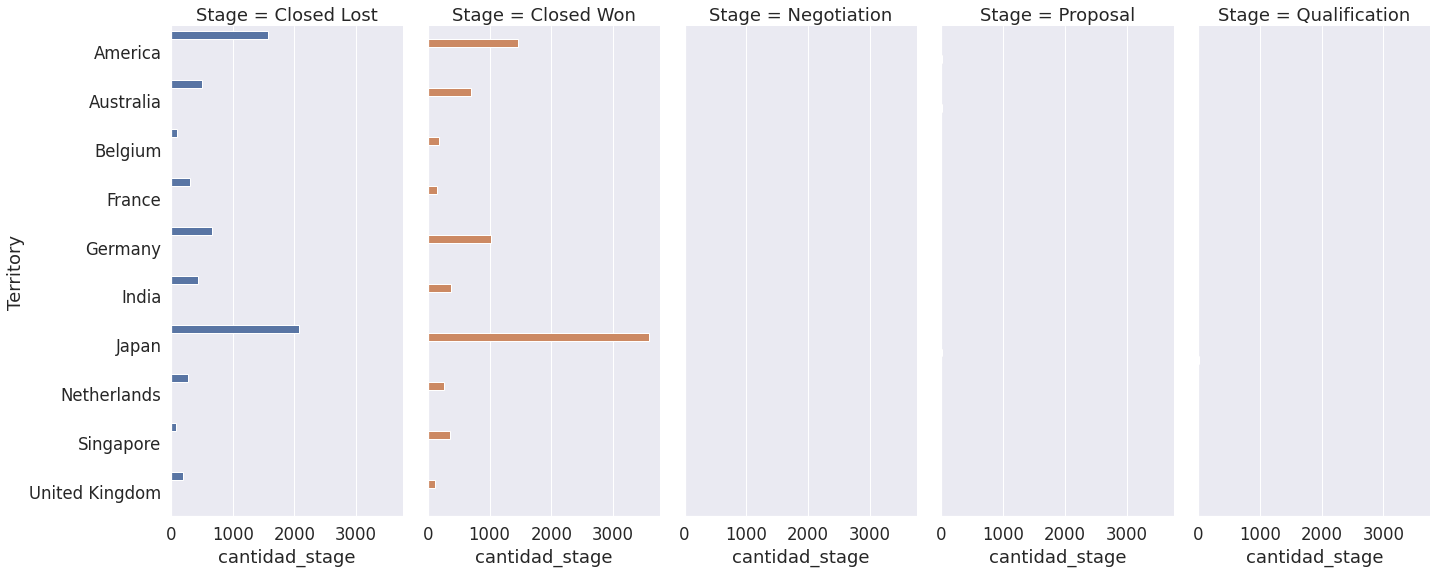

In [50]:
sns.set(font_scale=1.5) 
sns.catplot(x="cantidad_stage",y="Territory",col="Stage",\
    data=top10_reset,hue="Stage",kind="bar",height=8, aspect=.5)

Puedo concluir que no puedo sacar informacion de los estados que no sean Closed Lost y Won .. como se puede apreciar
Japon es el pais con el que mas ventas hemos realizado pero tenemos si bien es mucho menor a las ganadas varias 
ventas perdidas, por otro lado vemos que Francia y America son los paises en los que hemos perdido mas ventas que ganadas
y en singapur las ventas hechas has sido mucho mas exitosas en proporcion al resto.

ahora analizaremos para estas regiones como se distribuye verdaderamente las ventas si se hizo o no , si fue exitosa o no , etc.

In [52]:
Stage_por_Region=tp.groupby(["Region","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_ventas_Stage"}).reset_index()

In [53]:
#Stage_por_Region_desviacion=Stage_por_Region.groupby('Region').agg({'cantidad_ventas_Stage':"max"}).rename(columns={"cantidad_ventas_Stage":"max_cant_Region"}).reset_index()

NORMALIZE

In [54]:
from sklearn.preprocessing import normalize

In [55]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [56]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [57]:
Stage_por_Region

,Region,Stage,cantidad_ventas_Stage
0,APAC,Closed Lost,1355
1,APAC,Closed Won,1896
2,APAC,Proposal,8
3,APAC,Qualification,3
4,Americas,Closed Lost,2140
5,Americas,Closed Won,1793
6,Americas,Negotiation,8
7,Americas,Proposal,4
8,EMEA,Closed Lost,2189
9,EMEA,Closed Won,2471


In [58]:
Stage_por_Region["data_normalize"]=normalize(Stage_por_Region[["cantidad_ventas_Stage"]], axis=0)

In [59]:
Stage_por_Region_md_p=Stage_por_Region.pivot_table(columns="Stage",fill_value=0,index="Region",values="data_normalize")

In [60]:
Stage_por_Region_md_p

Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Region,,,,,
APAC,0.221056,0.309316,0.000000,0.001305,0.000489
Americas,0.349122,0.292512,0.001305,0.000653,0.000000
EMEA,0.357116,0.403122,0.000163,0.000489,0.000000
Japan,0.252216,0.542118,0.000163,0.002284,0.001305
Middle East,0.019577,0.008157,0.001305,0.000979,0.000000


<AxesSubplot:xlabel='Stage', ylabel='Region'>

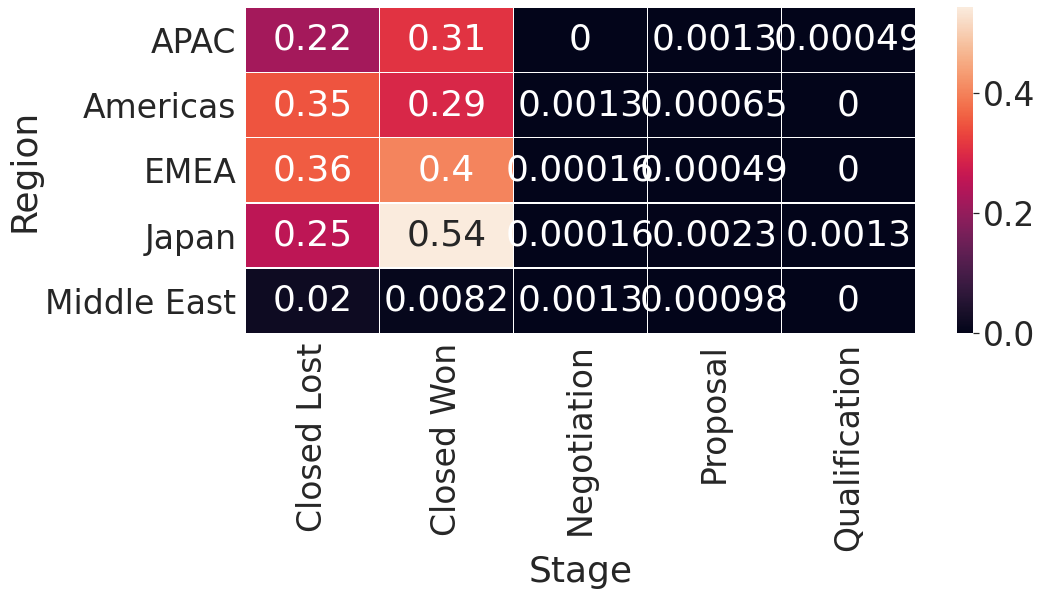

In [61]:
sns.heatmap(Stage_por_Region_md_p,annot=True,linewidths=.5)

CON LOS DATOS NORMALIZADO PODEMOS DARNOS CUENTA QUE NO SERIA RELEVANTE ESTUDIAR LOS CASOS DE VENTAS 
CON NEGOCIACIONES QUE QUEDARON INTERMEDIA PUES DE ESTAS TENEMOS MUY POCA INFORMACION
Y LO UNICO QUE NOS GENERARIA SERIA UN RUIDO EN EL ANALISIS DE DATOS.TAMBIEN SE PUEDE 
APRECIAR QUE LA REGION DE JAPON EMEA Y APAC SON LAS QUE POSEEN MAYOR PROBABILIDAD DE TERMINAR
DE FORMA EXITOSA, Y QUE EN LA REGION DE MIDDLE EAST EN MUCHO MAS PROBABLE PERDER 
LA VENTA POR MUCHO aunque lastimosamante a vista no se pueda determinar la diferencia.

In [62]:
tp.groupby(["Account_Created_Date","Account_Name"]).agg({"Account_Name":"count"})

Account_Name
Account_Created_Date Account_Name                   
2013-07-27           Account_Name_106              2
                     Account_Name_1064            24
                     Account_Name_1067           116
                     Account_Name_1083            22
                     Account_Name_1087            22
...                                              ...
2018-12-17           Account_Name_1786             1
2018-12-19           Account_Name_1327             4
                     Account_Name_705              1
2018-12-20           Account_Name_1571             1
2018-12-21           Account_Name_1825             1

[1637 rows x 1 columns]

In [63]:
tp.Account_Name.value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_1612       1
Account_Name_886        1
Account_Name_571        1
Account_Name_94         1
Account_Name_131        1
Name: Account_Name, Length: 1635, dtype: int64

In [64]:
tp["Account_Created_Date_year"]=tp.Account_Created_Date.dt.year
tp["Account_Created_Date_month"]=tp.Account_Created_Date.dt.month
tp["Account_Created_Date_count"]=tp.Account_Created_Date.dt.month

In [65]:
tp["Account_Created_Date_year"].value_counts()

2015    4927
2013    4550
2016    3115
2017    2210
2014    1381
2018     764
Name: Account_Created_Date_year, dtype: int64

In [66]:
tp_Account_Name_year_stage_count=tp.groupby(["Account_Name","Account_Created_Date_year","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"count_stage"}).reset_index()#.sort_values("count_stage",ascending=False)

In [67]:
tp_Account_Name_year_stage_count=tp_Account_Name_year_stage_count.sort_values("count_stage",ascending=False)

In [68]:
tp_Account_Name_year_stage_count_lost=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Stage.str.contains("Closed Lost")].head(15)
tp_Account_Name_year_stage_count_won=tp_Account_Name_year_stage_count.loc[tp_Account_Name_year_stage_count.Stage.str.contains("Closed Won")].head(15)

In [69]:
tp_Account_Name_year_stage_count_won

,Account_Name,Account_Created_Date_year,Stage,count_stage
1023,Account_Name_1888,2015,Closed Won,1018
969,Account_Name_1836,2015,Closed Won,795
1277,Account_Name_25,2013,Closed Won,539
1134,Account_Name_1991,2013,Closed Won,520
581,Account_Name_1508,2015,Closed Won,323
504,Account_Name_1440,2013,Closed Won,267
1291,Account_Name_263,2013,Closed Won,205
730,Account_Name_1642,2014,Closed Won,204
2032,Account_Name_931,2016,Closed Won,203
1595,Account_Name_533,2013,Closed Won,190


In [70]:
tp_Account_Name_year_stage_count_lost

,Account_Name,Account_Created_Date_year,Stage,count_stage
1022,Account_Name_1888,2015,Closed Lost,1104
1276,Account_Name_25,2013,Closed Lost,213
729,Account_Name_1642,2014,Closed Lost,193
1594,Account_Name_533,2013,Closed Lost,93
968,Account_Name_1836,2015,Closed Lost,91
1746,Account_Name_660,2016,Closed Lost,81
1133,Account_Name_1991,2013,Closed Lost,66
434,Account_Name_1378,2014,Closed Lost,57
75,Account_Name_1067,2013,Closed Lost,50
503,Account_Name_1440,2013,Closed Lost,50


In [71]:
tp_Account_Name_year_stage_count_lost=tp_Account_Name_year_stage_count_lost.rename(columns={"Account_Created_Date_year":"Year",\
                                "count_stage":"Cantidad de Ventas Perdidas"})
tp_Account_Name_year_stage_count_won=tp_Account_Name_year_stage_count_won.rename(columns={"Account_Created_Date_year":"Year",\
                                "count_stage":"Cantidad de Ventas Exitosas"})

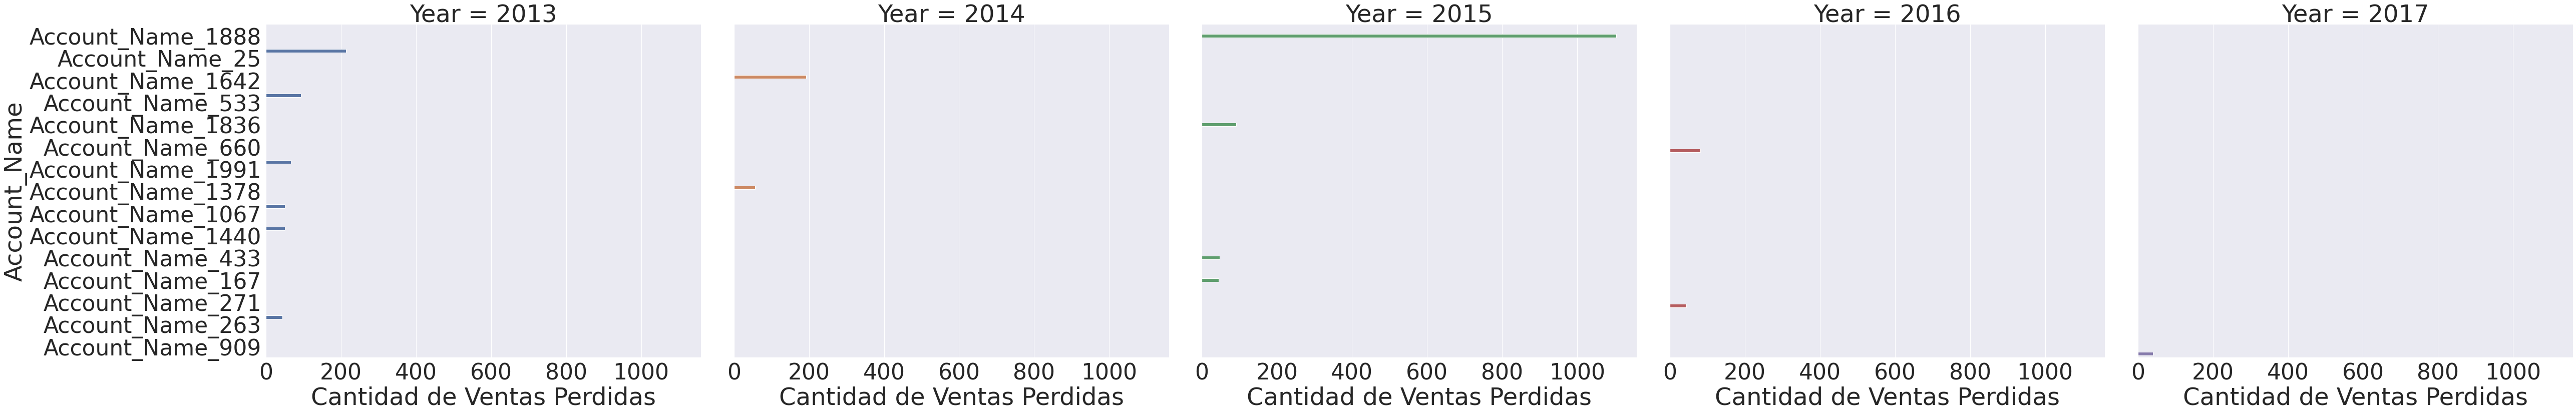

In [112]:
sns.set(font_scale=4) 
ax=sns.catplot(x="Cantidad de Ventas Perdidas",y="Account_Name",col="Year",\
data=tp_Account_Name_year_stage_count_lost,hue="Year",kind="bar",height=12, aspect=1.2)

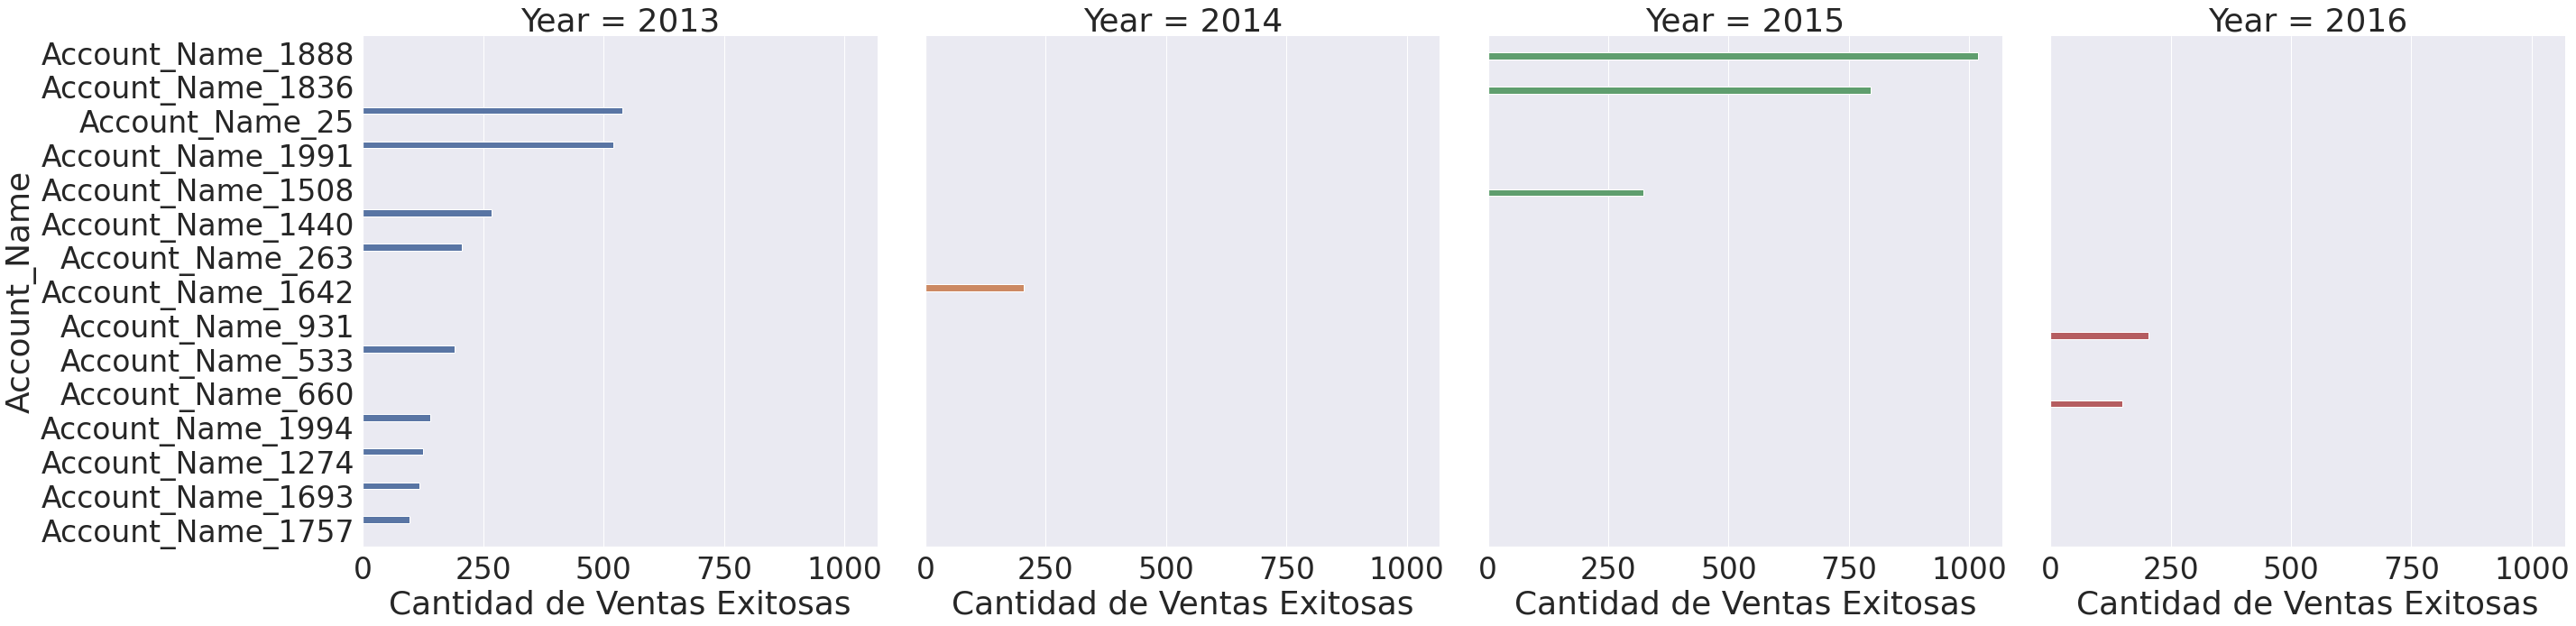

In [73]:
sns.set(font_scale=3) 
g=sns.catplot(x="Cantidad de Ventas Exitosas",y="Account_Name",col="Year",\
    data=tp_Account_Name_year_stage_count_won,hue="Year",kind="bar",height=10, aspect=1)
plt.show()

Puedo notar que los clientes del 2013 son con los que mas hemos tenigos ventas exitosas pero nuestro cliente mas grande
es el cliente 1836 ya que con el hemos tenido la mayor cantidad de ventas exitos por otro lado el cliente 1888 
es con el que hemos tenido si bien una gran cantidad de ventas exitosas 
tambien una gran cantidad de ventas perdidas.

In [74]:
tp["Submitted_for_Approval"].value_counts().head(25)

0    16947
Name: Submitted_for_Approval, dtype: int64

Submitted_for_Approval analizando este dato podemos ver que todas las ventas que fueron enviadas para su aprobacion
entonce no puedo sacar alguna conclucion 

In [75]:
tp["Bureaucratic_Code_0_Approved"].value_counts().head(25)

0    11543
1     5404
Name: Bureaucratic_Code_0_Approved, dtype: int64

In [76]:
tp["Bureaucratic_Code_0_Approval"].value_counts().head(25)

0    8889
1    8058
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [77]:
tp_code_Bureaucratic_0=tp.groupby(["Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cantidad_stage"}).reset_index()

In [78]:
tp_code_Bureaucratic_0

,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Stage,cantidad_stage
0,0,0,Closed Lost,2961
1,0,0,Closed Won,5928
2,1,0,Closed Lost,1846
3,1,0,Closed Won,787
4,1,0,Negotiation,1
5,1,0,Proposal,9
6,1,0,Qualification,11
7,1,1,Closed Lost,2543
8,1,1,Closed Won,2818
9,1,1,Negotiation,17


In [79]:
tp_code_Bureaucratic_0=tp_code_Bureaucratic_0.rename(columns={"Bureaucratic_Code_0_Approval":"Requiere Code 0","Bureaucratic_Code_0_Approved":"Aprobado Code 0"})

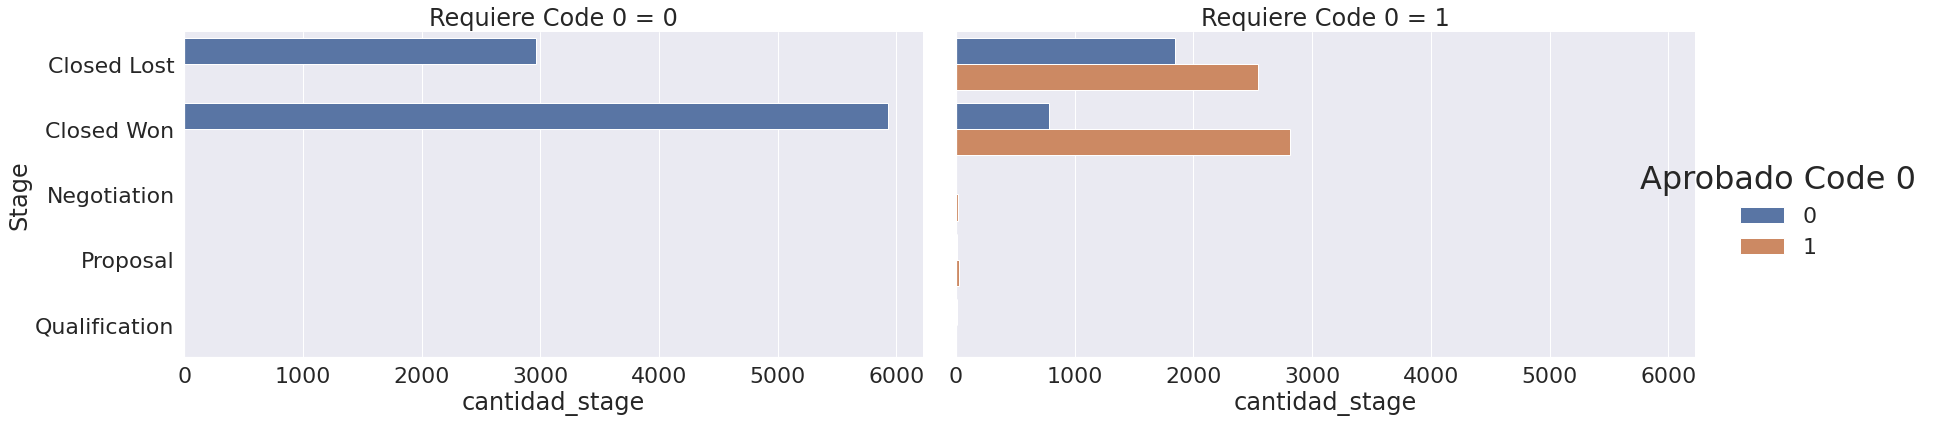

In [80]:
sns.set(font_scale=2) 
g=sns.catplot(x="cantidad_stage",y="Stage",col="Requiere Code 0",\
    data=tp_code_Bureaucratic_0,hue="Aprobado Code 0",kind="bar",height=6, aspect=2)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [81]:
tp["Bureaucratic_Code"].value_counts().head(25)

Bureaucratic_Code_4    12587
Bureaucratic_Code_5     3803
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [82]:
Bureaucratic_Code_Stage_Count=tp[["Bureaucratic_Code","Stage"]].groupby(["Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"Bureaucratic_Code_Stage_Count"}).reset_index()

In [83]:
Bureaucratic_Code_Stage_Count

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count
0,Bureaucratic_Code_0,Closed Won,51
1,Bureaucratic_Code_1,Closed Lost,159
2,Bureaucratic_Code_1,Closed Won,102
3,Bureaucratic_Code_2,Closed Lost,128
4,Bureaucratic_Code_2,Closed Won,114
5,Bureaucratic_Code_3,Closed Lost,1
6,Bureaucratic_Code_3,Closed Won,1
7,Bureaucratic_Code_4,Closed Lost,4291
8,Bureaucratic_Code_4,Closed Won,8253
9,Bureaucratic_Code_4,Negotiation,17


In [84]:
#Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_normalize"]=(Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count"]-Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_min"])/(Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_max"]-Bureaucratic_Code_Stage_Count_norm["Bureaucratic_Code_Stage_Count_min"])
Bureaucratic_Code_Stage_Count["data_normalize"]=normalize(Bureaucratic_Code_Stage_Count[["Bureaucratic_Code_Stage_Count"]], axis=0)

In [85]:
Bureaucratic_Code_Stage_Count

,Bureaucratic_Code,Stage,Bureaucratic_Code_Stage_Count,data_normalize
0,Bureaucratic_Code_0,Closed Won,51,0.005224
1,Bureaucratic_Code_1,Closed Lost,159,0.016288
2,Bureaucratic_Code_1,Closed Won,102,0.010449
3,Bureaucratic_Code_2,Closed Lost,128,0.013112
4,Bureaucratic_Code_2,Closed Won,114,0.011678
5,Bureaucratic_Code_3,Closed Lost,1,0.000102
6,Bureaucratic_Code_3,Closed Won,1,0.000102
7,Bureaucratic_Code_4,Closed Lost,4291,0.439567
8,Bureaucratic_Code_4,Closed Won,8253,0.845432
9,Bureaucratic_Code_4,Negotiation,17,0.001741


In [86]:
Bureaucratic_Code_Stage_Count_normalize_p=Bureaucratic_Code_Stage_Count.pivot_table(index="Stage",fill_value=0,columns="Bureaucratic_Code",values="data_normalize")

<AxesSubplot:xlabel='Bureaucratic_Code', ylabel='Stage'>

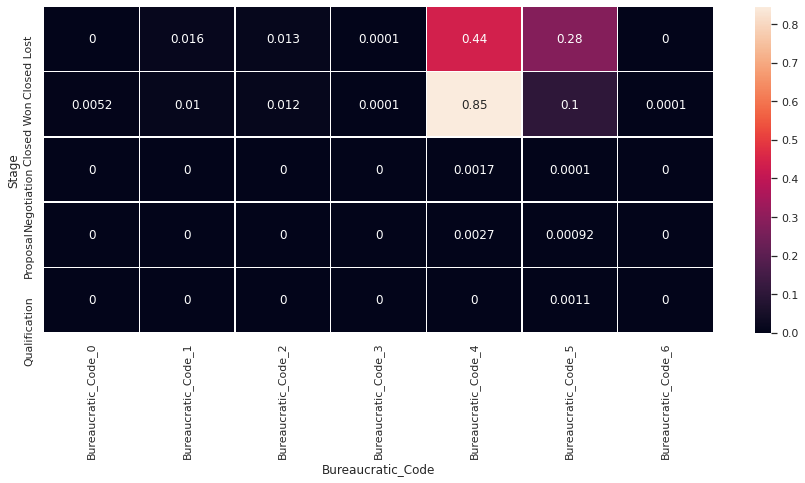

In [87]:
sns.set(font_scale=1) 
sns.heatmap(Bureaucratic_Code_Stage_Count_normalize_p,annot=True,linewidths=.5)

puedo sacar mas conclusiones de aquellas ventas con codigo burocratio 4 que es mucho mas probable que se cierre una venta si se adquiere
este codigo y si el codigo es 5 es mas probable que se pierda la venta.De los demas codigos no puedo decir mucho ya que no poseo los datos suficentes para hacer una afirmacio.

UNIENDO

In [88]:
tp_terri_Acconun=tp[["Territory","Account_Name","Stage"]].merge(tp_top10,how="right",on="Territory")

In [89]:
tp_terri_Acconun

,Territory,Account_Name,Stage,cantidad_ventas
0,Japan,Account_Name_619,Closed Lost,5680
1,Japan,Account_Name_619,Closed Won,5680
2,Japan,Account_Name_1888,Closed Lost,5680
3,Japan,Account_Name_1888,Closed Lost,5680
4,Japan,Account_Name_1888,Closed Lost,5680
...,...,...,...,...
14440,Belgium,Account_Name_350,Closed Won,285
14441,Belgium,Account_Name_350,Closed Won,285
14442,Belgium,Account_Name_1100,Closed Won,285
14443,Belgium,Account_Name_1274,Closed Won,285


In [90]:
tp_terri_Acconun_=tp_terri_Acconun.groupby(["Territory","Account_Name","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant"}).sort_values("cant",ascending=False).reset_index()#.head(20)#.unstack(fill_value=0)#.head(10)

In [91]:
tp_terri_Acconun_

,Territory,Account_Name,Stage,cant
0,Japan,Account_Name_1888,Closed Lost,1104
1,Japan,Account_Name_1888,Closed Won,1018
2,Japan,Account_Name_1836,Closed Won,795
3,Japan,Account_Name_1991,Closed Won,520
4,America,Account_Name_25,Closed Won,515
...,...,...,...,...
1843,Japan,Account_Name_1181,Closed Lost,1
1844,Japan,Account_Name_1181,Closed Won,1
1845,Germany,Account_Name_1459,Closed Lost,1
1846,Japan,Account_Name_1196,Closed Lost,1


In [92]:
tp_terri_Acconun_=tp_terri_Acconun_.head(30)

In [93]:
tp_terri_Acconun_

,Territory,Account_Name,Stage,cant
0,Japan,Account_Name_1888,Closed Lost,1104
1,Japan,Account_Name_1888,Closed Won,1018
2,Japan,Account_Name_1836,Closed Won,795
3,Japan,Account_Name_1991,Closed Won,520
4,America,Account_Name_25,Closed Won,515
5,Japan,Account_Name_1508,Closed Won,323
6,Australia,Account_Name_1440,Closed Won,267
7,America,Account_Name_25,Closed Lost,208
8,Australia,Account_Name_1642,Closed Won,204
9,Australia,Account_Name_1642,Closed Lost,193


In [94]:
tp_terri_Acconun_["data_normalize"]=normalize(tp_terri_Acconun_[["cant"]],axis=0)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
tp_terri_Acconun_

,Territory,Account_Name,Stage,cant,data_normalize
0,Japan,Account_Name_1888,Closed Lost,1104,0.557320
1,Japan,Account_Name_1888,Closed Won,1018,0.513905
2,Japan,Account_Name_1836,Closed Won,795,0.401331
3,Japan,Account_Name_1991,Closed Won,520,0.262506
4,America,Account_Name_25,Closed Won,515,0.259981
5,Japan,Account_Name_1508,Closed Won,323,0.163056
6,Australia,Account_Name_1440,Closed Won,267,0.134787
7,America,Account_Name_25,Closed Lost,208,0.105002
8,Australia,Account_Name_1642,Closed Won,204,0.102983
9,Australia,Account_Name_1642,Closed Lost,193,0.097430


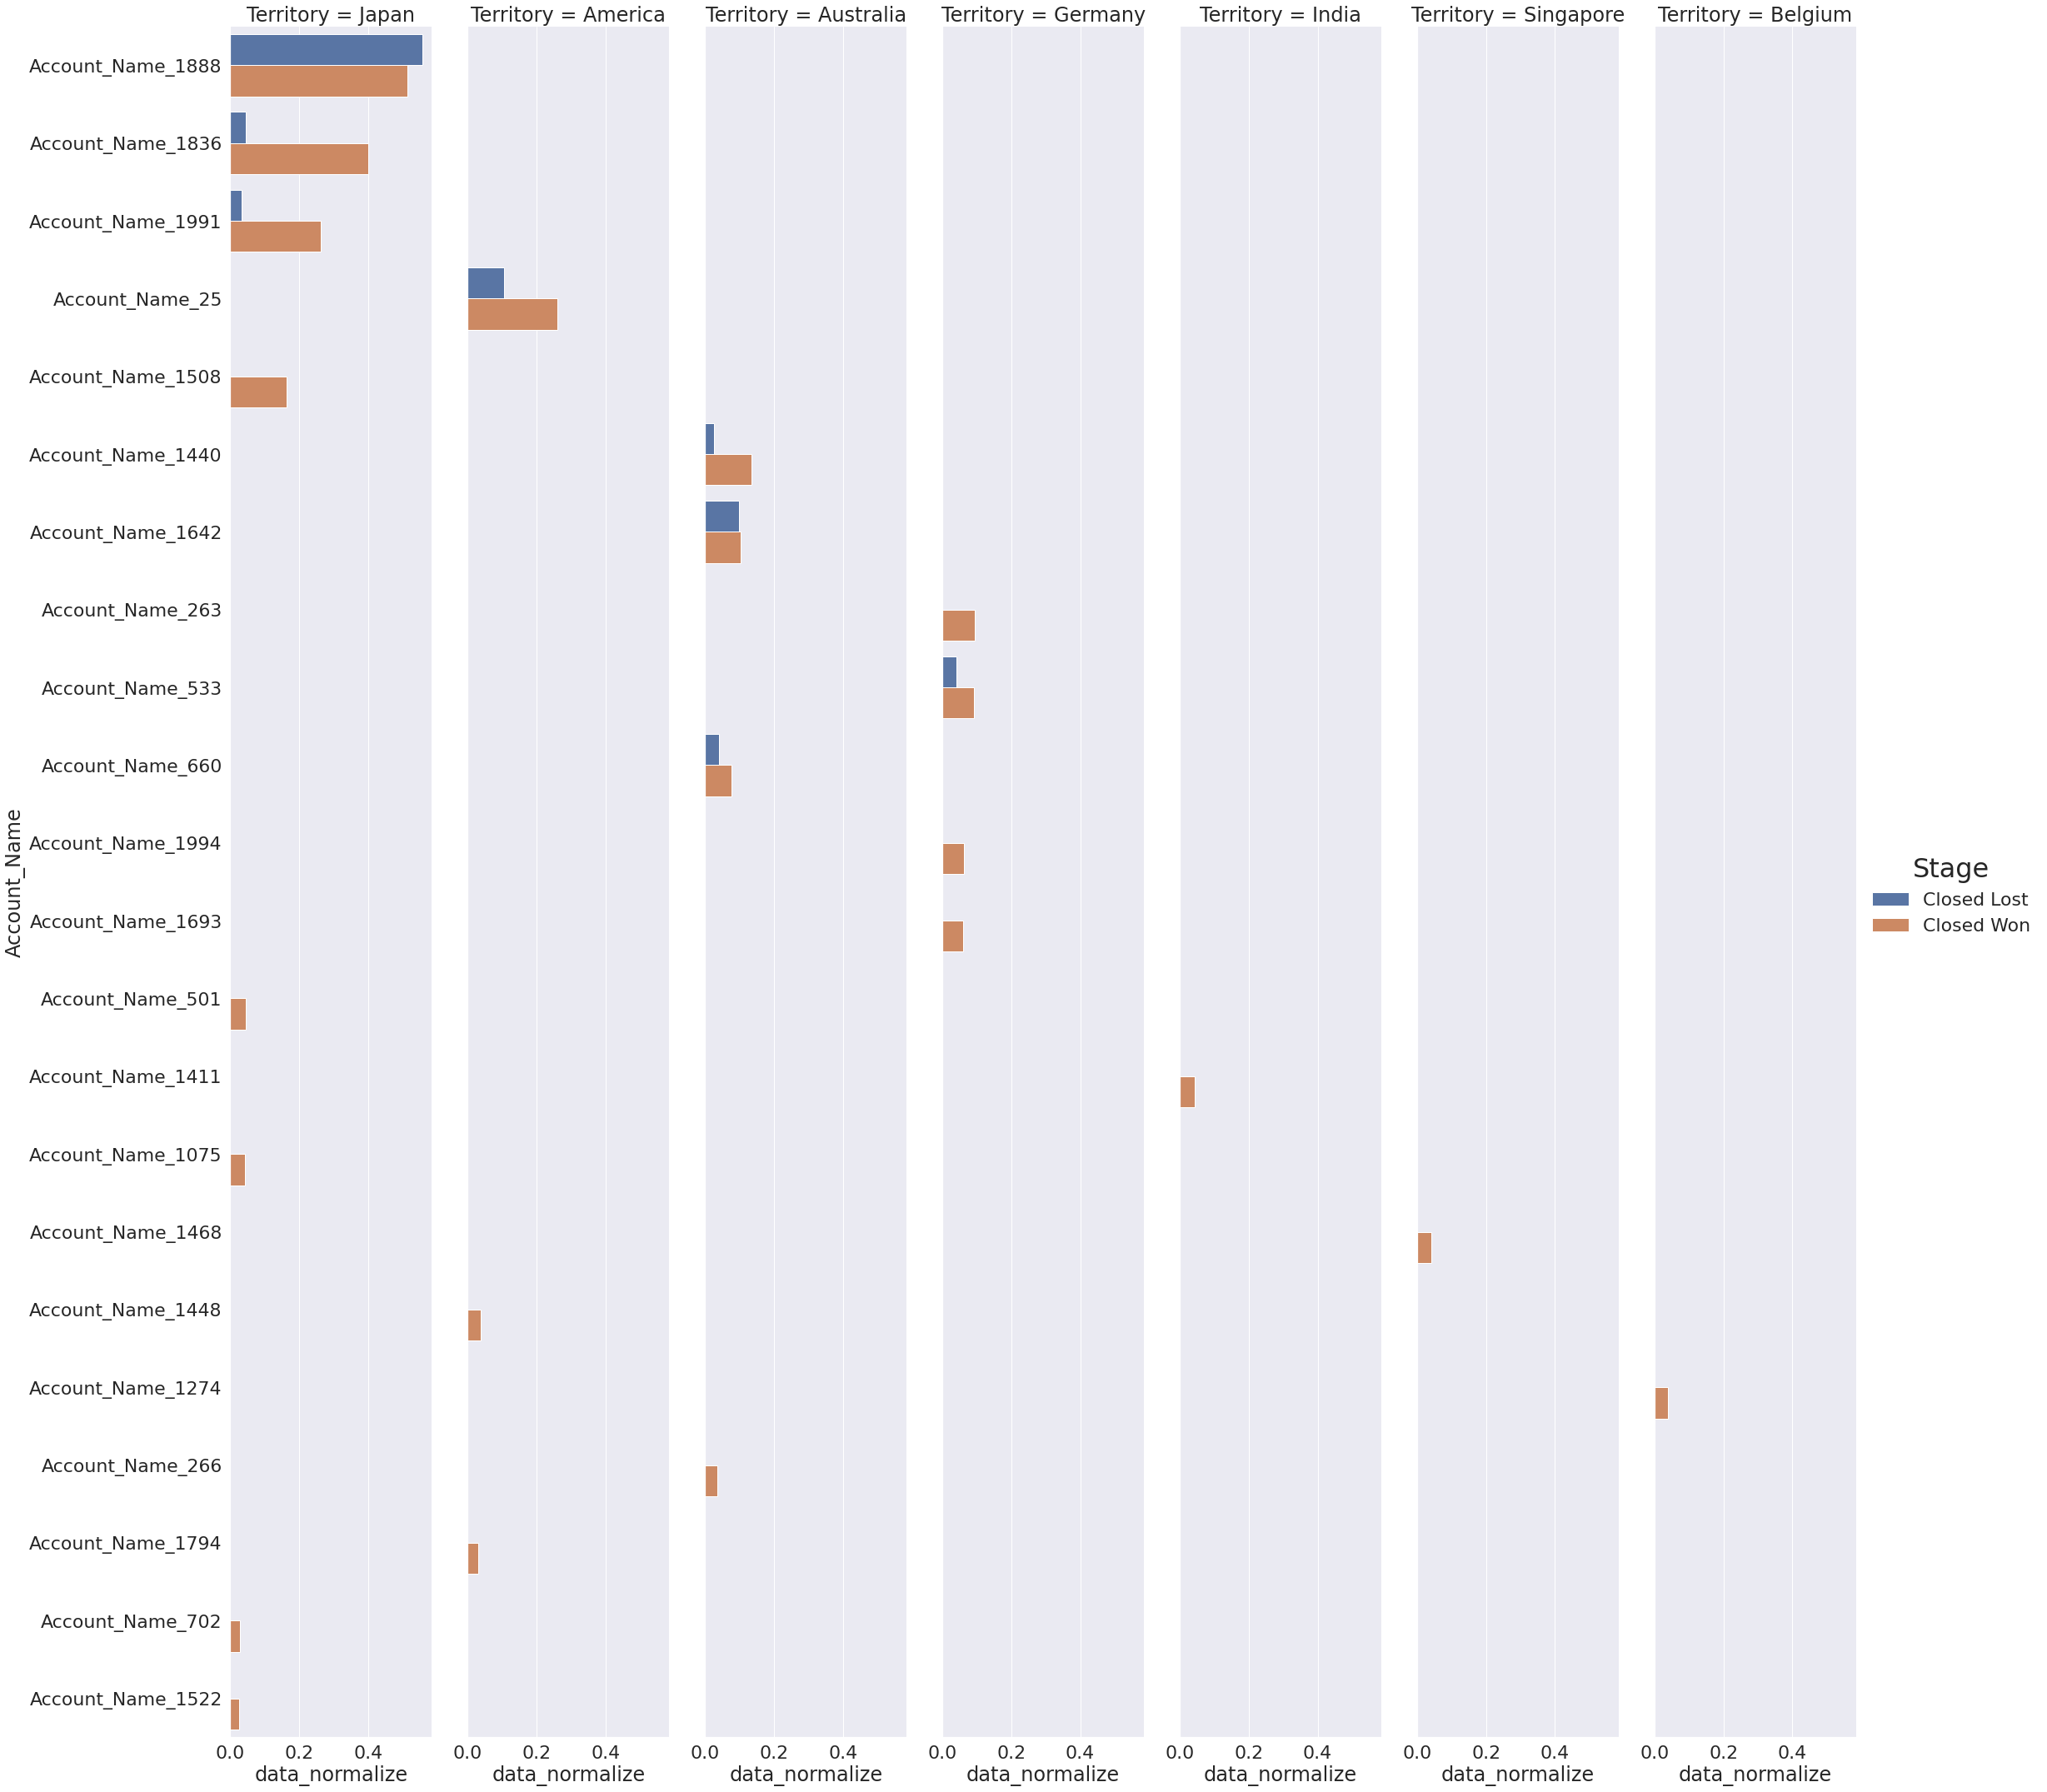

In [96]:
sns.set(font_scale=2) 
ax=sns.catplot(x="data_normalize",y="Account_Name",col="Territory",\
   data=tp_terri_Acconun_,hue="Stage",kind="bar",height=30, aspect=.15)
plt.setp(ax._legend.get_texts(), fontsize=22)
plt.setp(ax._legend.get_title(), fontsize=32)
plt.show()

In [97]:
tp_top10

,Territory,cantidad_ventas
0,Japan,5680
1,America,3045
2,Germany,1682
3,Australia,1208
4,India,809
5,Netherlands,533
6,France,449
7,Singapore,441
8,United Kingdom,313
9,Belgium,285


In [98]:
tp_TBS=tp[["Account_Name","Territory","Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]]

In [99]:
tp_TBS=tp_TBS.merge(tp_top10,on="Territory",how="right")

In [133]:
tp_TBS_res=tp_TBS.groupby(["Territory","Bureaucratic_Code_0_Approval","Bureaucratic_Code_0_Approved","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"caunt_S"}).sort_values("caunt_S",ascending=False).unstack(fill_value=0)#.reset_index()#.head(50)

In [134]:
level_0=tp_TBS_res.columns.get_level_values(0)
level_1=tp_TBS_res.columns.get_level_values(1)

In [135]:
tp_TBS_res.columns=level_0+"_"+level_1

In [138]:
tp_TBS_res=tp_TBS_res.rename(columns={"caunt_S_Closed Lost":"Closed Lost","caunt_S_Closed Won":"Closed Won","caunt_S_Negotiation":"Negotiation","caunt_S_Proposal":"Proposal",\
                 "caunt_S_Qualification":"Qualification"})

In [178]:
tp_TBS_res.sort_values("Closed Won",ascending=False)

,,,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Territory,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,,,,,
Japan,0,0,1131,2847,0,0,0
America,0,0,510,807,0,0,0
Japan,1,1,336,677,0,7,0
Germany,0,0,249,572,0,0,0
America,1,1,644,415,8,5,0
Australia,1,1,271,324,0,4,0
Germany,1,1,285,319,0,0,0
Australia,0,0,103,249,0,0,0
America,1,0,413,243,0,0,0


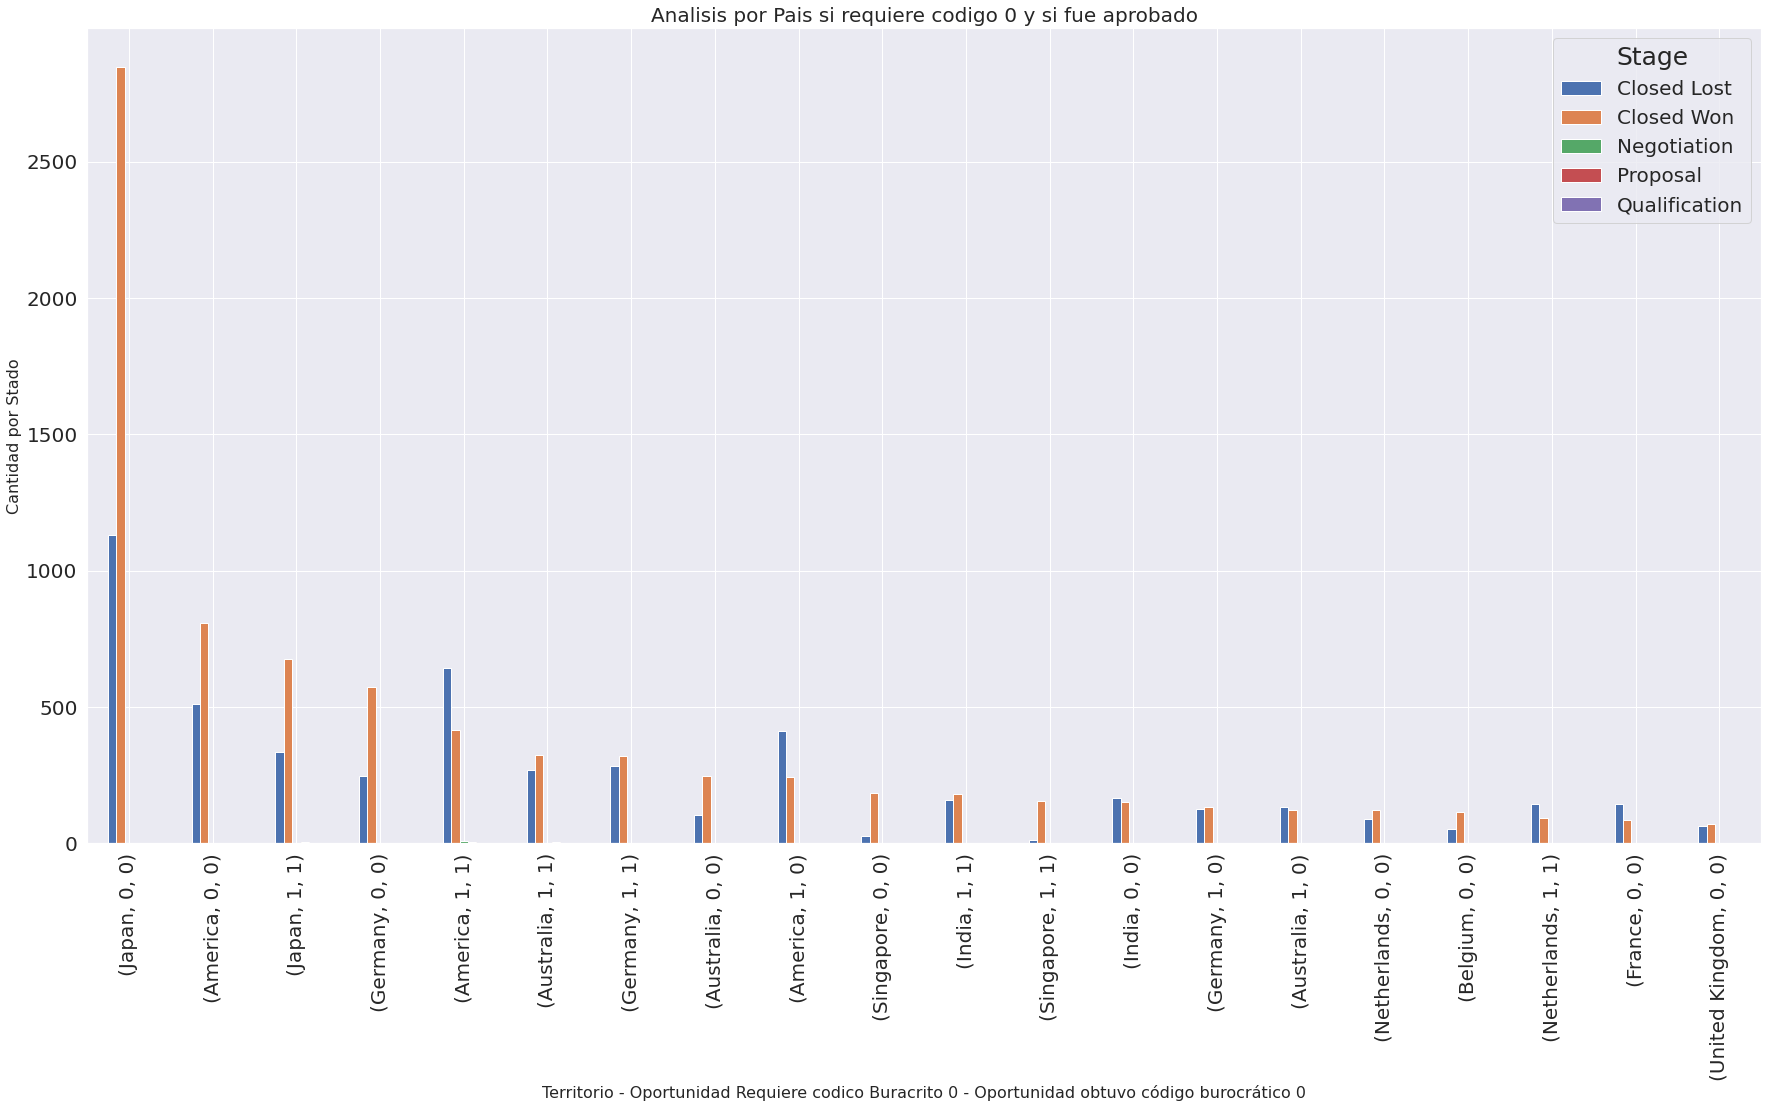

In [181]:
g=tp_TBS_res.sort_values("Closed Won",ascending=False).head(20).plot(kind='bar', figsize=(30,15) ,fontsize=20)
plt.title('Analisis por Pais si requiere codigo 0 y si fue aprobado', fontsize=20);
plt.xlabel('Territorio - Oportunidad Requiere codico Buracrito 0 - Oportunidad obtuvo código burocrático 0', fontsize=16);
plt.ylabel('Cantidad por Stado', fontsize=16)
plt.legend(title="Stage", fontsize=20, title_fontsize=25)
plt.show()

In [147]:
tp.groupby(["Account_Name","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).head(20)

cant_stage
Account_Name      Bureaucratic_Code   Stage                  
Account_Name_1888 Bureaucratic_Code_5 Closed Lost        1076
                  Bureaucratic_Code_4 Closed Won         1008
Account_Name_1836 Bureaucratic_Code_4 Closed Won          795
Account_Name_1991 Bureaucratic_Code_4 Closed Won          503
Account_Name_25   Bureaucratic_Code_4 Closed Won          459
Account_Name_1508 Bureaucratic_Code_4 Closed Won          321
Account_Name_1440 Bureaucratic_Code_4 Closed Won          220
Account_Name_931  Bureaucratic_Code_4 Closed Won          202
Account_Name_1642 Bureaucratic_Code_4 Closed Lost         178
Account_Name_263  Bureaucratic_Code_4 Closed Won          177
Account_Name_660  Bureaucratic_Code_4 Closed Won          150
Account_Name_25   Bureaucratic_Code_4 Closed Lost         143
Account_Name_533  Bureaucratic_Code_4 Closed Won          140
Account_Name_1642 Bureaucratic_Code_4 Closed Won          131
Account_Name_1994 Bureaucratic_Code_4 Closed Won          110
Account_Name_1693 Bureaucratic_Code_4 Closed Won          108
Account_Name_1274 Bureaucratic_Code_4 Closed Won          100
Account_Name_501  Bureaucratic_Code_4 Closed Won           90
Account_Name_1757 Bureaucratic_Code_4 Closed Won           89
Account_Name_1411 Bureaucratic_Code_4 Closed Won           85

In [174]:
code_1_1=tp.loc[(tp.Bureaucratic_Code_0_Approval==1)&(tp.Bureaucratic_Code_0_Approved==1)].groupby(["Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

In [175]:
code_1_1

,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
0,1,Bureaucratic_Code_4,Closed Won,2729
1,1,Bureaucratic_Code_4,Closed Lost,2479
2,1,Bureaucratic_Code_1,Closed Lost,56
3,1,Bureaucratic_Code_1,Closed Won,41
4,1,Bureaucratic_Code_0,Closed Won,36
5,1,Bureaucratic_Code_4,Proposal,26
6,1,Bureaucratic_Code_4,Negotiation,17
7,1,Bureaucratic_Code_5,Closed Won,11
8,1,Bureaucratic_Code_5,Closed Lost,7
9,1,Bureaucratic_Code_3,Closed Lost,1


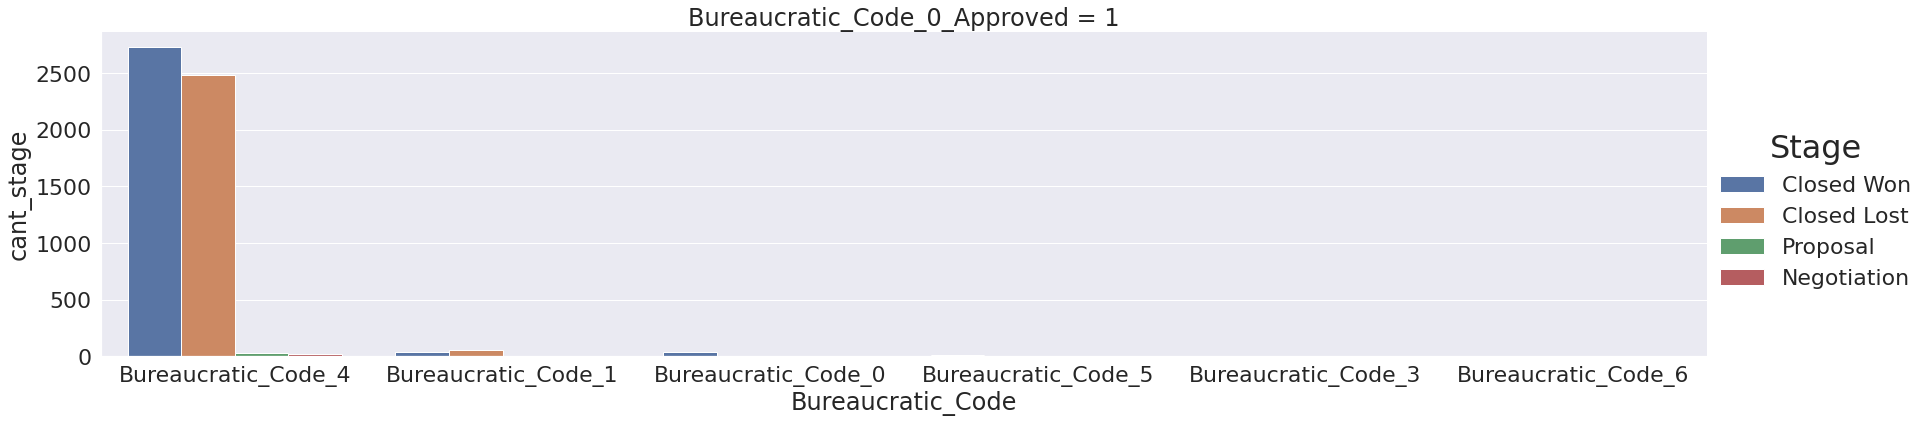

In [176]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code",y="cant_stage",col="Bureaucratic_Code_0_Approved",\
    data=code_1_1,hue="Stage",kind="bar",height=6, aspect=4)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [168]:
code_1_0=tp.loc[(tp.Bureaucratic_Code_0_Approval==1)&(tp.Bureaucratic_Code_0_Approved==0)].groupby(["Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

In [171]:
code_1_0

,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Stage,cant_stage
0,0,Bureaucratic_Code_5,Closed Lost,1718
1,0,Bureaucratic_Code_5,Closed Won,673
2,0,Bureaucratic_Code_2,Closed Lost,128
3,0,Bureaucratic_Code_2,Closed Won,114
4,0,Bureaucratic_Code_5,Qualification,11
5,0,Bureaucratic_Code_5,Proposal,9
6,0,Bureaucratic_Code_5,Negotiation,1


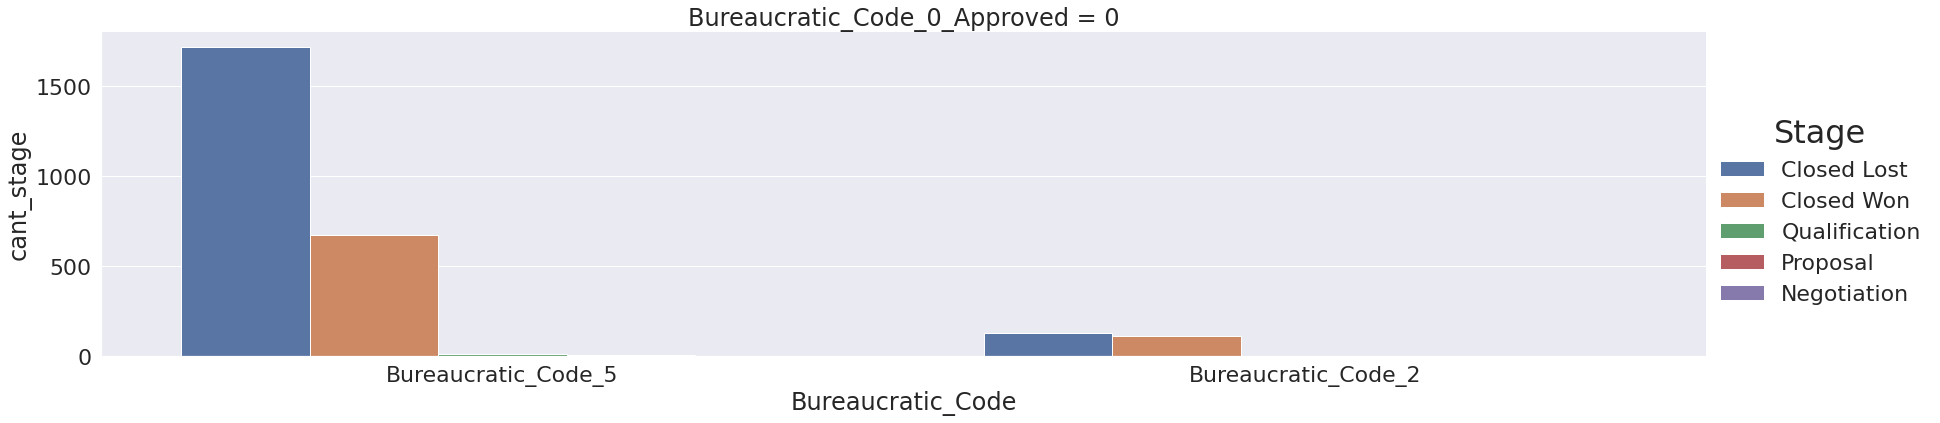

In [169]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code",y="cant_stage",col="Bureaucratic_Code_0_Approved",\
    data=code_1_0,hue="Stage",kind="bar",height=6, aspect=4)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [172]:
code_0_0=tp.loc[tp.Bureaucratic_Code_0_Approval==0].groupby(["Bureaucratic_Code_0_Approved","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).reset_index()

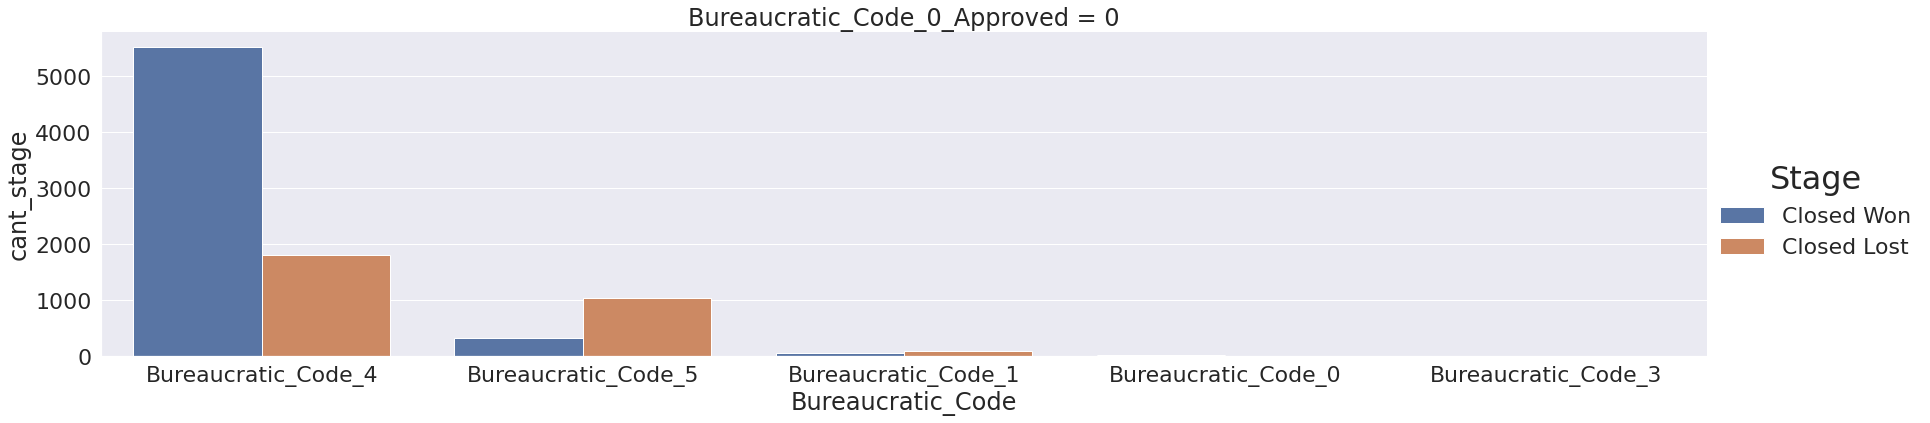

In [173]:
sns.set(font_scale=2) 
g=sns.catplot(x="Bureaucratic_Code",y="cant_stage",col="Bureaucratic_Code_0_Approved",\
    data=code_0_0,hue="Stage",kind="bar",height=6, aspect=4)

plt.setp(g._legend.get_texts(), fontsize=22)
plt.setp(g._legend.get_title(), fontsize=32)
plt.show()

In [193]:
tp.loc[tp.Territory.str.contains("Japan")].groupby(["Territory","Account_Name","Bureaucratic_Code_0_Approved","Bureaucratic_Code_0_Approval","Bureaucratic_Code","Stage"]).agg({"Stage":"count"}).rename(columns={"Stage":"cant_stage"}).sort_values("cant_stage",ascending=False).head(20)
#.reset_index()

cant_stage
Territory Account_Name      Bureaucratic_Code_0_Approved Bureaucratic_Code_0_Approval Bureaucratic_Code   Stage                  
Japan     Account_Name_1888 0                            0                            Bureaucratic_Code_4 Closed Won          880
          Account_Name_1836 0                            0                            Bureaucratic_Code_4 Closed Won          782
          Account_Name_1888 0                            0                            Bureaucratic_Code_5 Closed Lost         755
          Account_Name_1991 0                            0                            Bureaucratic_Code_4 Closed Won          323
          Account_Name_1888 0                            1                            Bureaucratic_Code_5 Closed Lost         321
          Account_Name_1508 0                            0                            Bureaucratic_Code_4 Closed Won          239
          Account_Name_1991 1                            1                            Bureaucratic_Code_4 Closed Won          180
          Account_Name_1888 1                            1                            Bureaucratic_Code_4 Closed Won          128
          Account_Name_1508 1                            1                            Bureaucratic_Code_4 Closed Won           82
          Account_Name_501  1                            1                            Bureaucratic_Code_4 Closed Won           56
          Account_Name_1836 0                            1                            Bureaucratic_Code_5 Closed Lost          49
          Account_Name_1075 0                            0                            Bureaucratic_Code_4 Closed Won           46
          Account_Name_2037 0                            0                            Bureaucratic_Code_4 Closed Won           38
          Account_Name_1836 0                            0                            Bureaucratic_Code_5 Closed Lost          35
          Account_Name_501  0                            0                            Bureaucratic_Code_4 Closed Won           34
          Account_Name_702  0                            0                            Bureaucratic_Code_4 Closed Won           33
          Account_Name_1075 1                            1                            Bureaucratic_Code_4 Closed Won           29
          Account_Name_1508 0                            0                            Bureaucratic_Code_4 Closed Lost          26
          Account_Name_1522 0                            0                            Bureaucratic_Code_4 Closed Won           26
          Account_Name_1240 0                            0                            Bureaucratic_Code_4 Closed Won           25